In [204]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
np.random.seed(42)

In [205]:
# Niesamowita funkcja do wizualizacji
def plot_decision_boundary(X, y, model, title):

    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    h = .02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))

    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto', alpha=0.6)

    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', edgecolor='white', s=40, label='Class 0 (True)')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', edgecolor='white', s=40, label='Class 1 (True)')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title, fontsize=15)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left', frameon=True, fancybox=True, framealpha=0.9)
    plt.show()

## Diagonal dataset

In [206]:

n_samples = 1000

X_diag = np.random.uniform(-2, 2, size=(n_samples, 2))

noise = np.random.normal(0, 0.05, n_samples)
y_diag = (X_diag[:, 1] > X_diag[:, 0] + noise).astype(int)

In [207]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diag, y_diag, test_size=0.2, random_state=42)


lr_model = LogisticRegression()
lr_model.fit(X_train_d, y_train_d)


dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train_d, y_train_d)



DecisionTreeClassifier(max_depth=3, random_state=42)

Logistyczna Regresja

Dataset 1 (Diagonal) - Logistic Regression Accuracy: 0.9900


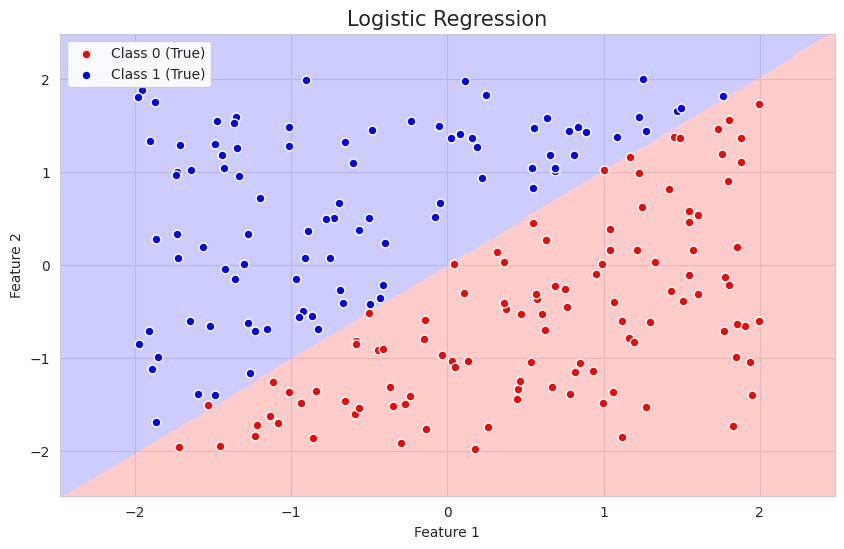

In [208]:

print(f"Dataset 1 (Diagonal) - Logistic Regression Accuracy: {accuracy_score(y_test_d, lr_model.predict(X_test_d)):.4f}")
plot_decision_boundary(X_test_d, y_test_d, lr_model, "Logistic Regression")




In [209]:
print("Współczynniki modelu: ", lr_model.coef_)

Współczynniki modelu:  [[-5.27143217  5.21039923]]


In [210]:
print("Współczynniki modelu bias: ", list(lr_model.intercept_))

Współczynniki modelu bias:  [np.float64(0.01326643605647998)]


## 1. Parametry modelu

**Wagi**:  
- w₁ = −5.27143217  
- w₂ = 5.21039923  

**Bias (wyraz wolny)**:  
- b = 0.01326644  

---

## 2. Równanie liniowe (logit / wynik z)

Suma ważona cech wejściowych z biasem:

$$
z = (-5.27143217)\,x_1 + (5.21039923)\,x_2 + 0.01326644
$$

gdzie:
- \(x_1\) – wartość pierwszej cechy  
- \(x_2\) – wartość drugiej cechy  

---

## 3. Równanie prawdopodobieństwa (hipoteza)

Funkcja sigmoidalna:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Prawdopodobieństwo przynależności do klasy 1:

$$
P(y=1 \mid \mathbf{x}) =
\frac{1}{1 + e^{-(-5.27143217 x_1 + 5.21039923 x_2 + 0.01326644)}}
$$

---

## 4. Interpretacja decyzji

Model przewiduje **klasę 1**, gdy:

$$
P(y=1 \mid \mathbf{x}) > 0.5
$$

co jest równoważne warunkowi:

$$
-5.27143217 x_1 + 5.21039923 x_2 + 0.01326644 > 0
$$


In [211]:
# Wezmy przykladowe dane
x=[0.5,0.1]
print("Wartosc :", np.dot(x,lr_model.coef_[0])+lr_model.intercept_[0])

Wartosc : -2.1014097246896255


In [212]:
x=[0.3,0.35]
print("Wartosc :", np.dot(x,lr_model.coef_[0])+lr_model.intercept_[0])

Wartosc : 0.25547651577599434


Czas na drzewko

Dataset 1 (Diagonal) - Decision Tree Accuracy:      0.9250


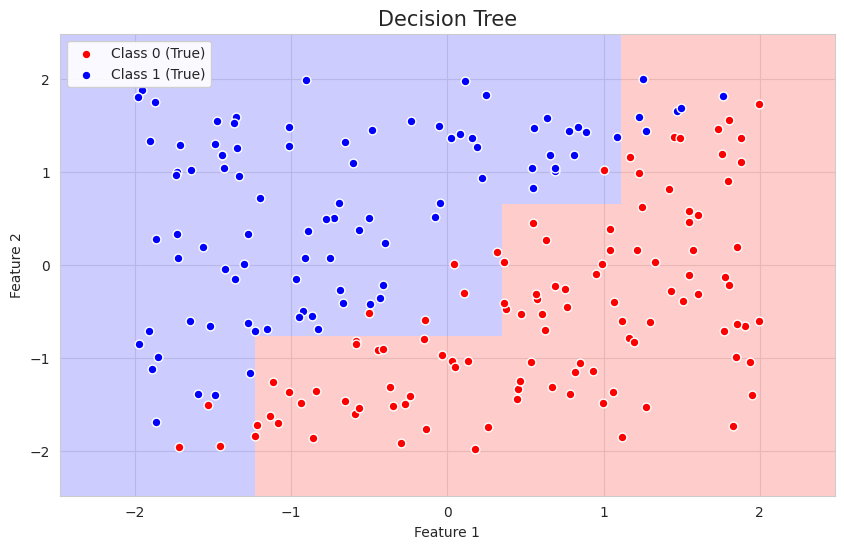

In [213]:
print(f"Dataset 1 (Diagonal) - Decision Tree Accuracy:      {accuracy_score(y_test_d, dt_model.predict(X_test_d)):.4f}")

plot_decision_boundary(X_test_d, y_test_d, dt_model, "Decision Tree")

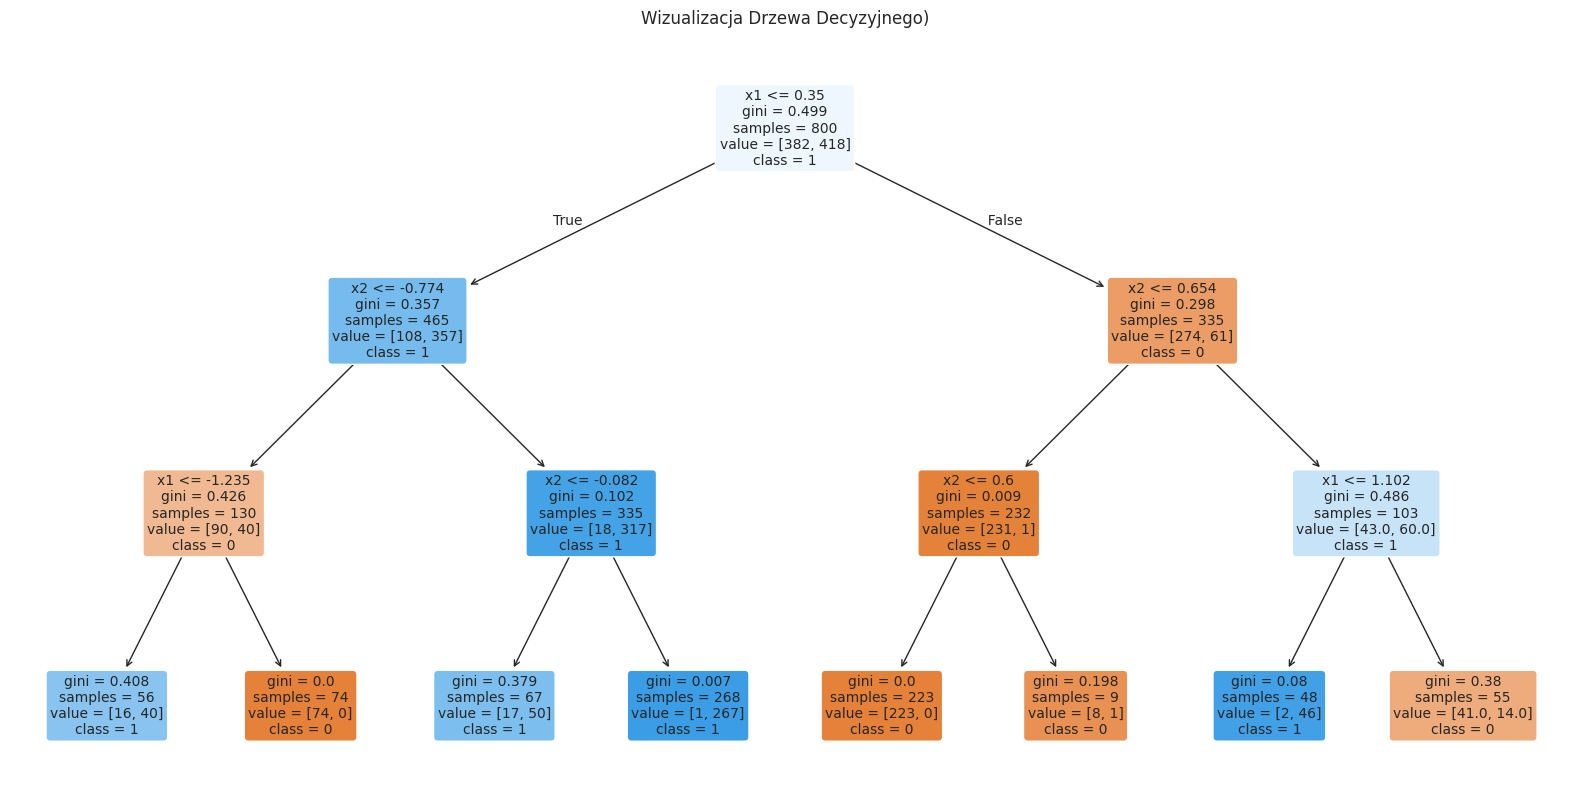

In [214]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))

plot_tree(dt_model,
          filled=True,
          rounded=True,
          feature_names=['x1', 'x2'],
          class_names=['0', '1'],
          fontsize=10)

plt.title("Wizualizacja Drzewa Decyzyjnego)")
plt.show()

# Kryterium Giniego w drzewach decyzyjnych

**Kryterium Giniego** (Gini Impurity) to miara **nieczystości węzła** w drzewach decyzyjnych
stosowana głównie w problemach **klasyfikacji**.

## Wzor
Dla węzła zawierającego próbki należące do \(K\) klas:

$$
G = 1 - \sum_{i=1}^{K} p_i^2
$$

gdzie:
- \(p_i\) — prawdopodobieństwo (udział) klasy \(i\) w węźle  
- \(K\) — liczba klas  

---

## Interpretacja

- \(G = 0\) — węzeł **czysty** (wszystkie próbki należą do jednej klasy)
- \(G \approx 0.5\) — maksymalna nieczystość dla dwóch klas
- Im **niższa** wartość Giniego, tym **lepszy** podział

---

## 4. Przykład (klasyfikacja binarna)

Załóżmy węzeł zawierający:
- 80% próbek klasy 1
- 20% próbek klasy 0

$$
G = 1 - (0.8^2 + 0.2^2)
$$

$$
G = 1 - (0.64 + 0.04) = 0.32
$$

---

## 5. Kryterium podziału w drzewie decyzyjnym

Podczas budowy drzewa decyzyjnego algorytm wybiera podział,
który **minimalizuje ważoną nieczystość Giniego** dzieci:


$$
G_{\text{split}} =
\sum_{j=1}^{m}
\frac{N_j}{N} \, G_j
$$

gdzie:
- \(m\) — liczba węzłów potomnych (zwykle 2)
- \(N\) — liczba próbek w węźle rodzica
- \(N_j\) — liczba próbek w węźle potomnym
- \(G_j\) — nieczystość Giniego węzła potomnego

---

## XOR Dataset

In [215]:

X_xor = np.random.uniform(-2, 2, size=(n_samples, 2))


y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)


X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(X_xor, y_xor, test_size=0.2, random_state=42)


lr_model_xor = LogisticRegression()
lr_model_xor.fit(X_train_x, y_train_x)

dt_model_xor = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_xor.fit(X_train_x, y_train_x)


DecisionTreeClassifier(max_depth=5, random_state=42)

Logistyczna regresja

Dataset 2 (XOR) - Logistic Regression Accuracy: 0.4000


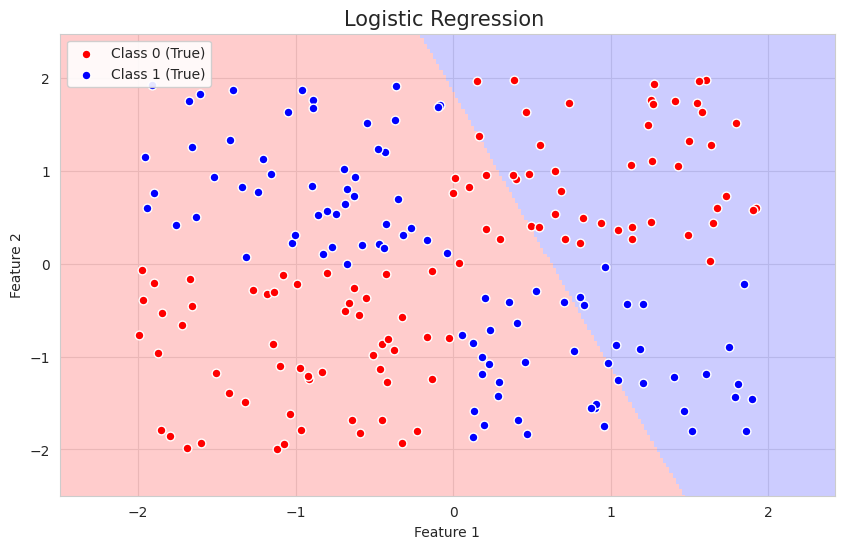

In [216]:
print(f"Dataset 2 (XOR) - Logistic Regression Accuracy: {accuracy_score(y_test_x, lr_model_xor.predict(X_test_x)):.4f}")
plot_decision_boundary(X_test_x, y_test_x, lr_model_xor, "Logistic Regression ")

Drzewko

Dataset 2 (XOR) - Decision Tree Accuracy:      0.9750


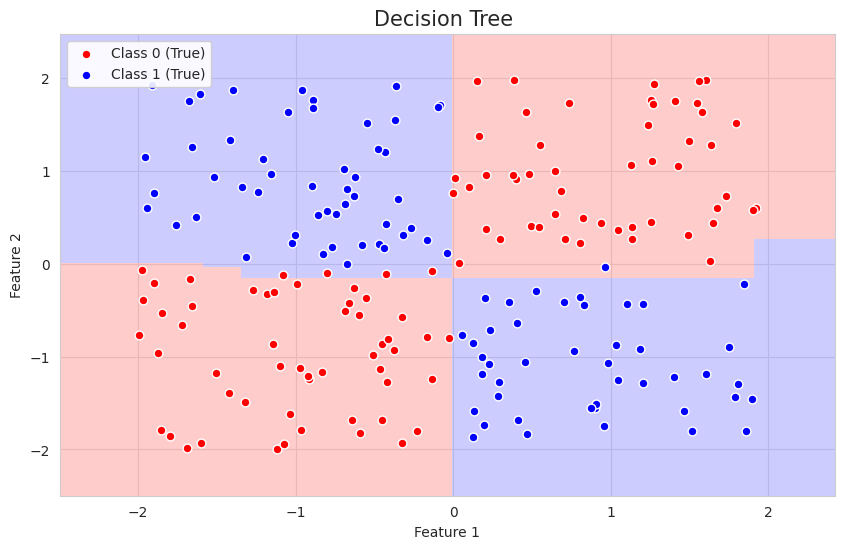

In [217]:
print(f"Dataset 2 (XOR) - Decision Tree Accuracy:      {accuracy_score(y_test_x, dt_model_xor.predict(X_test_x)):.4f}")
plot_decision_boundary(X_test_x, y_test_x, dt_model_xor, "Decision Tree ")

## O metrykach słów kilka

In [218]:
y_pred=dt_model_xor.predict(X_test_x)
y_test=y_test_x

In [219]:
def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    return np.array([[tn, fp],
                     [fn, tp]])

cm = confusion_matrix(y_test, y_pred)
print("Macierz konfuzji:\n", cm)


Macierz konfuzji:
 [[101   4]
 [  1  94]]


In [220]:
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1] + 1e-9)
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0] + 1e-9)
f1 = 2 * precision * recall / (precision + recall + 1e-9)

print(f"Accuracy : {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall   : {recall:.3f}")
print(f"F1-score : {f1:.3f}")

Accuracy : 0.975
Precision: 0.959
Recall   : 0.989
F1-score : 0.974


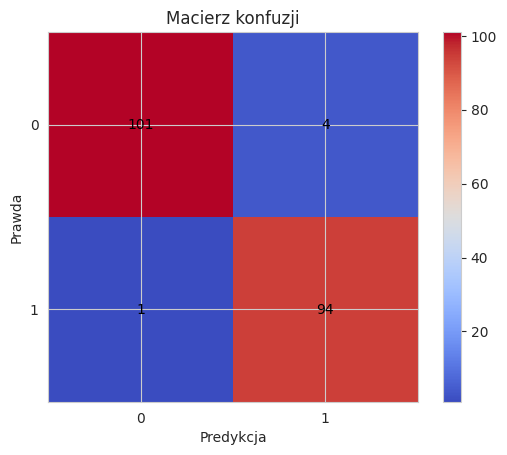

In [221]:
plt.figure()
plt.imshow(cm, cmap="coolwarm")
plt.title("Macierz konfuzji")
plt.xlabel("Predykcja")
plt.ylabel("Prawda")
plt.xticks([0, 1], ["0", "1"])
plt.yticks([0, 1], ["0", "1"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.colorbar()
plt.show()

Normalnie tego nikt tak nie robi. Są już napisane funkcje.

## Oczywiście modeli klasyfikacji jest znacznie więcej ...

In [222]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier


rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_x, y_train_x)

svc_model = SVC()
svc_model.fit(X_train_x, y_train_x)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_x, y_train_x)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_x, y_train_x)

gauss_model = GaussianNB()
gauss_model.fit(X_train_x, y_train_x)


print(f"Dataset 2 (XOR) - Logistic Regression: {accuracy_score(y_test_x, lr_model_xor.predict(X_test_x)):.4f}")
print(f"Dataset 2 (XOR) - Decision Tree :      {accuracy_score(y_test_x, dt_model_xor.predict(X_test_x)):.4f}")
print(f"Dataset 2 (XOR) - RF:      {accuracy_score(y_test_x, rf_model.predict(X_test_x)):.4f}")
print(f"Dataset 2 (XOR) - SVC:     {accuracy_score(y_test_x, svc_model.predict(X_test_x)):.4f}")
print(f"Dataset 2 (XOR) - KNN:     {accuracy_score(y_test_x, knn_model.predict(X_test_x)):.4f}")
print(f"Dataset 2 (XOR) - GB:      {accuracy_score(y_test_x, gb_model.predict(X_test_x)):.4f}")
print(f"Dataset 2 (XOR) - Gauss:   {accuracy_score(y_test_x, gauss_model.predict(X_test_x)):.4f}")

Dataset 2 (XOR) - Logistic Regression: 0.4000
Dataset 2 (XOR) - Decision Tree :      0.9750
Dataset 2 (XOR) - RF:      1.0000
Dataset 2 (XOR) - SVC:     0.9750
Dataset 2 (XOR) - KNN:     0.9800
Dataset 2 (XOR) - GB:      1.0000
Dataset 2 (XOR) - Gauss:   0.4150
